In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("scores_data.csv")
data.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [3]:
data.shape

(149, 3)

In [4]:
print(data.columns)

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')


In [5]:
data.columns=data.columns.str.strip()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [7]:
data[['Obtained','Total']]=data['Score'].str.split('/',expand=True).astype(int)
data['Score_percent']=(data['Obtained']/data['Total'])*100
data.head()

,Batch,User_ID,Score,Obtained,Total,Score_percent
0,AI_ELITE_7,uid_149,6 / 7,6,7,85.714286
1,AI_ELITE_7,uid_148,6 / 7,6,7,85.714286
2,AI_ELITE_7,uid_147,7 / 7,7,7,100.000000
3,AI_ELITE_7,uid_146,7 / 7,7,7,100.000000
4,AI_ELITE_7,uid_145,4 / 7,4,7,57.142857


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Batch          149 non-null    object 
 1   User_ID        149 non-null    object 
 2   Score          149 non-null    object 
 3   Obtained       149 non-null    int64  
 4   Total          149 non-null    int64  
 5   Score_percent  149 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 7.1+ KB


In [9]:
data.describe()

,Obtained,Total,Score_percent
count,149.000000,149.0,149.000000
mean,4.382550,7.0,62.607862
std,1.592199,0.0,22.745705
min,0.000000,7.0,0.000000
25%,3.000000,7.0,42.857143
50%,4.000000,7.0,57.142857
75%,5.000000,7.0,71.428571
max,7.000000,7.0,100.000000


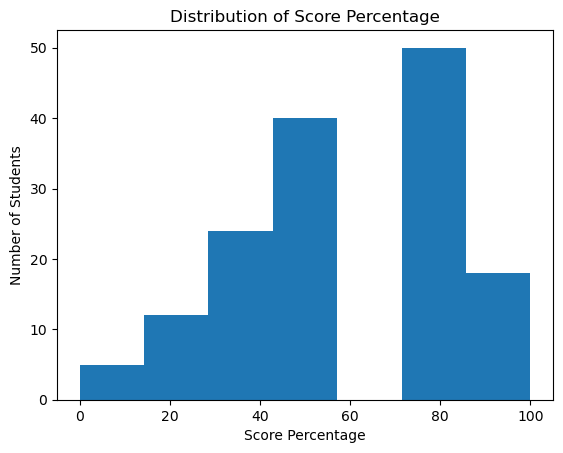

In [10]:
plt.hist(data['Score_percent'],bins=7)
plt.xlabel('Score Percentage')
plt.ylabel('Number of Students')
plt.title('Distribution of Score Percentage')
plt.show()

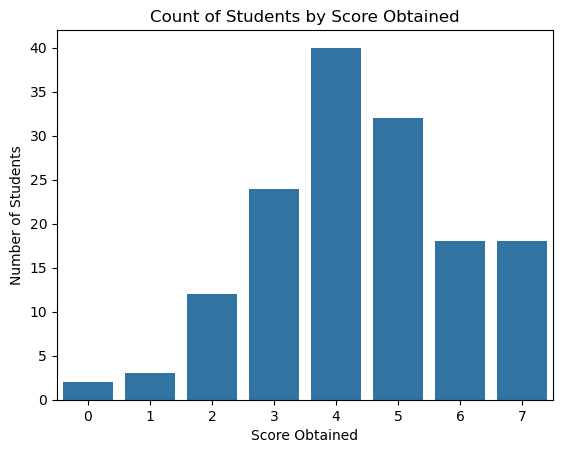

In [11]:
sns.countplot(x='Obtained',data=data)
plt.xlabel('Score Obtained')
plt.ylabel('Number of Students')
plt.title('Count of Students by Score Obtained')
plt.show()

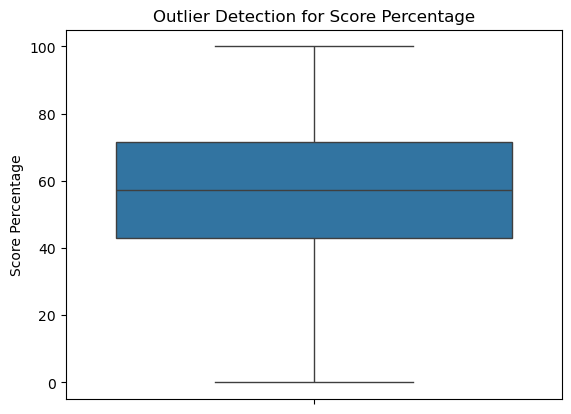

In [12]:
sns.boxplot(y=data['Score_percent'])
plt.ylabel('Score Percentage')
plt.title('Outlier Detection for Score Percentage')
plt.show()

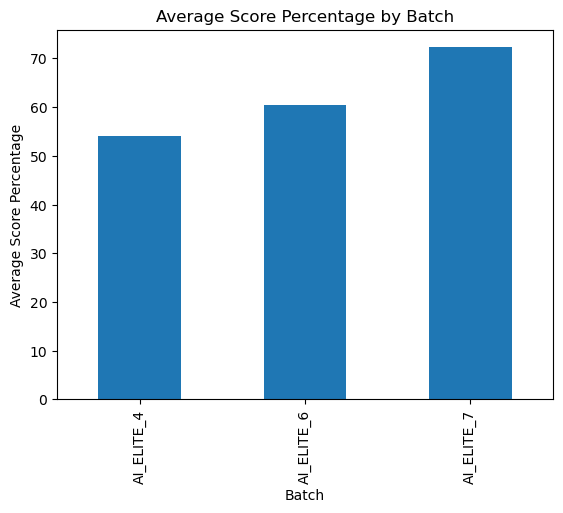

In [13]:
batch_avg=data.groupby('Batch')['Score_percent'].mean()
batch_avg.plot(kind='bar')
plt.xlabel('Batch')
plt.ylabel('Average Score Percentage')
plt.title('Average Score Percentage by Batch')
plt.show()

In [14]:
top_students=data.loc[data.groupby('Batch')['Score_percent'].idxmax(),['Batch','User_ID','Score_percent']]
top_students

,Batch,User_ID,Score_percent
101,AI_ELITE_4,uid_48,100.0
63,AI_ELITE_6,uid_86,100.0
2,AI_ELITE_7,uid_147,100.0


In [15]:
low_performers=data.loc[data.groupby('Batch')['Score_percent'].idxmin(),['Batch','User_ID','Score_percent']]
low_performers

,Batch,User_ID,Score_percent
135,AI_ELITE_4,uid_14,0.000000
68,AI_ELITE_6,uid_81,0.000000
37,AI_ELITE_7,uid_112,28.571429


In [16]:
batch_compare=data.groupby('Batch')['Score_percent'].agg(avg_score='mean',top_score='max')
batch_compare['top_vs_abg_gap']=(batch_compare['top_score']-batch_compare['avg_score'])
batch_compare

,avg_score,top_score,top_vs_abg_gap
Batch,,,
AI_ELITE_4,54.166667,100.0,45.833333
AI_ELITE_6,60.416667,100.0,39.583333
AI_ELITE_7,72.237197,100.0,27.762803


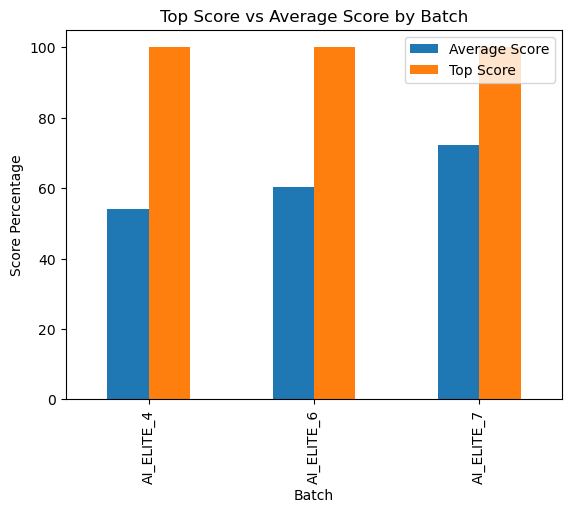

In [17]:
batch_compare[['avg_score','top_score']].plot(kind='bar')
plt.xlabel('Batch')
plt.ylabel('Score Percentage')
plt.title('Top Score vs Average Score by Batch')
plt.legend(['Average Score','Top Score'])
plt.show()

In [18]:
batch_size=data.groupby('Batch').size()
batch_analysis=pd.DataFrame({'batch_size':batch_size,'avg_score':batch_avg})
batch_analysis

,batch_size,avg_score
Batch,,
AI_ELITE_4,48,54.166667
AI_ELITE_6,48,60.416667
AI_ELITE_7,53,72.237197


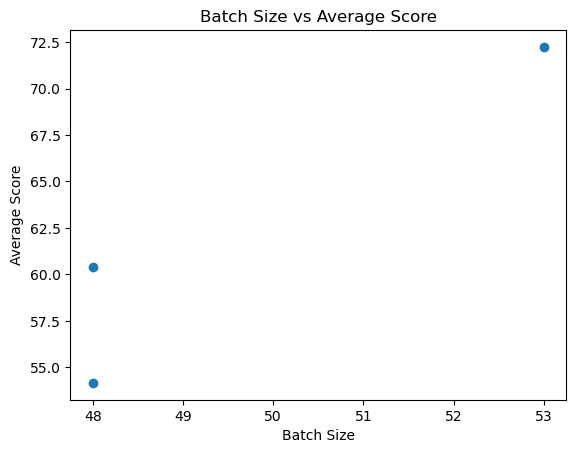

In [19]:
plt.scatter(batch_analysis['batch_size'],batch_analysis['avg_score'])
plt.xlabel('Batch Size')
plt.ylabel('Average Score')
plt.title('Batch Size vs Average Score')
plt.show()

In [20]:
batch_analysis.corr()

,batch_size,avg_score
batch_size,1.000000,0.940239
avg_score,0.940239,1.000000


In [21]:
bins=[0,50,75,100]
labels=['Low','Average','High']
data['Performance']=pd.cut(data['Score_percent'],bins=bins,labels=labels)
data['Performance'].value_counts()

Performance
Average    72
Low        39
High       36
Name: count, dtype: int64

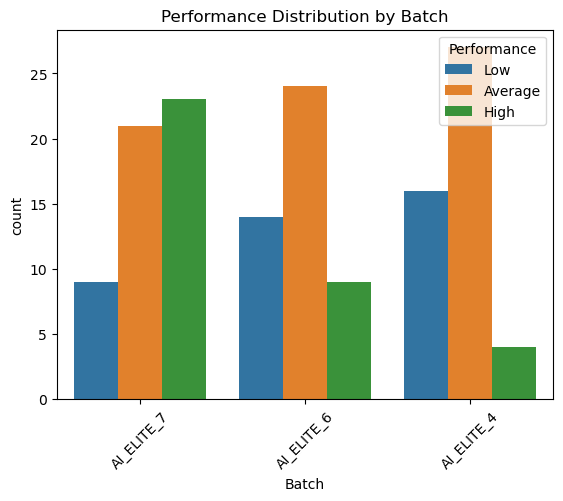

In [22]:
sns.countplot(x='Batch',hue='Performance',data=data)
plt.title('Performance Distribution by Batch')
plt.xticks(rotation=45)
plt.show()

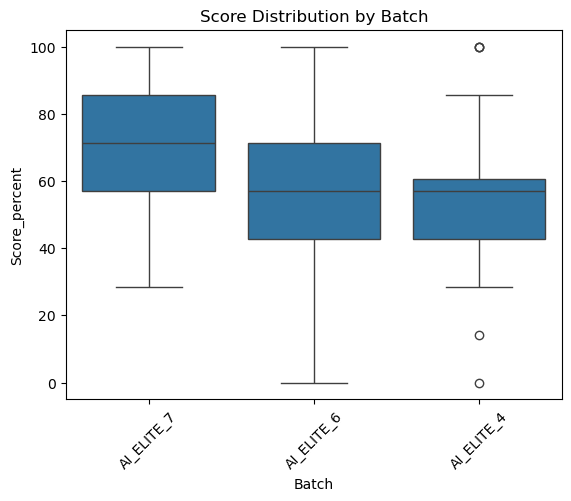

In [23]:
sns.boxplot(x='Batch',y='Score_percent',data=data)
plt.title('Score Distribution by Batch')
plt.xticks(rotation=45)
plt.show()

# Insights
- Performance is centered around mid-range scores
- All batches have top-performing students,but performance consistency is different in each batch
- AI_ELITE_7 batch is the most consistent batch,while other batches have more variation in student performance
- Batches with more students tend to have a higher average score
- Some batches require academic improvement support
- Target batches for intervention